# 부동산 가격변화 알아보기

- I. 출산율에 따른 부동산 가격 변화
- II. 역대 대통령 임기별 부동산 가격 변화
- III. 인구이동에 따른 부동산 가격 변화
- IV. 연도별 부동산 가격 변화

## 용어정리

주택매매 가격지수 : 아파트, 연립주택, 단독주택 등 주택시장의 평균적인 매매가격변화를 측정하는 지표.

주택전세 가격지수 : 아파트, 연립주택, 단독주택 등 주택시장의 평균적인 전세가격변화를 측정하는 지표.

지가 지수 : 감정 평가사가 평가한 표본지의 적정가격을 지수화한 것.

지가 변동률 : 기준시점 대비 해당시점의 지가지수의 상승분을 나타낸 것.

아파트 실거래 가격지수 : 전국의 재고 아파트 실제 거래가 및 가격변동률을 지수화 한 것.
			(기준년도 아파트의 가격을 100으로 봤을 때, 현재 가격의 오르내림 정도를 반영 지수로 표기)

주택월세통합가격지수 : 기준시점 대비 해당시점의 지가지수의 상승분을 나타낸 것.
			(인터넷에는 같은 명칭

# 아이디어 접근 
- MZ세대가 집을 구하기 어려운 이유 
- 코로나, 금리, 정책변동, 1인가구수의 증가, 급여변동x 
- 서울과 부산지역의 부동산 가격 변화 시각화해보자 ! 
- 역세권에 따른 집값변동 조사
- 고용률과 주택수요의 관련성

In [ ]:
from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
import warnings
import matplotlib
import matplotlib.dates as mdates
import folium,json
from folium import plugins
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.dates as mdates

In [ ]:
path = 'mount/MyDrive/estate/한국 부동산 데이터 시각화 경진대회_data/'

# **I. 출산율과 혼인율 변화**

주거 공간은 가족 구성에도 큰 영향을 미친다.

좁은 집에서 대식구가 살기는 어렵다.

가족의 구성원이 늘어나기 위해선 그에 상응하는 충분한 주거공간이 필요하다.

가족 구성원이 변화하는 것은 출산과 결혼을 통해 나타난다.

출산율과 혼인율에는 취업율 등의 어려요소가 영향을 미치겠지만,

이러한 요소들은 공통적으로 미래에 대한 기대, '미래에 내가 가정을 꾸리고 살아갈 수 있다'는 생각과 환경에 영향을 미치는 요소들이라고 생각한다.

가정을 꾸리기 위해선 가족이 살아갈 주거공간 마련이 필수이기에, 특히 집값은 여러 영향요인 중 큰 비중을 차지할 것으로 보인다.

따라서 출산율과 혼인률의 변화를 살펴본뒤,

집값변화와의 관계를 살펴보자

# 1. 출산율

## 1) 출산율

- 합계 출산율 (TFR, Total Fertility Rate) : 여성 1명이 평생동안 낳을 것으로 예상되는 평균 출생아 수를 나타낸 지표로서 연령별 출산율(ASFR)의 총합이며, 출산력 수준을 나타내는 대표적 지표임

출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 - 출생아수, 합계출산율, 자연증가 등 (1970~2020)

In [ ]:
birth = pd.read_csv(path+'출산율/'+'출생아수_합계출산율_자연증가_등.csv', encoding = 'cp949',index_col =[0])

In [ ]:
birth = birth.T
birth = birth.drop(['항목','단위','Unnamed: 54'], axis=0)
birth = birth.astype('float64')
birth=birth.rename(index=lambda x:x[0:4])

In [ ]:
birth.head(3)

기본항목별,출생아수(명),자연증가건수(명),조출생률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명)
1970,1006645.0,748056.0,31.2,23.2,4.53,109.5
1971,1024773.0,787245.0,31.2,23.9,4.54,109.0
1972,952780.0,742709.0,28.4,22.2,4.12,109.5


출생아 수 (2000년 이후)

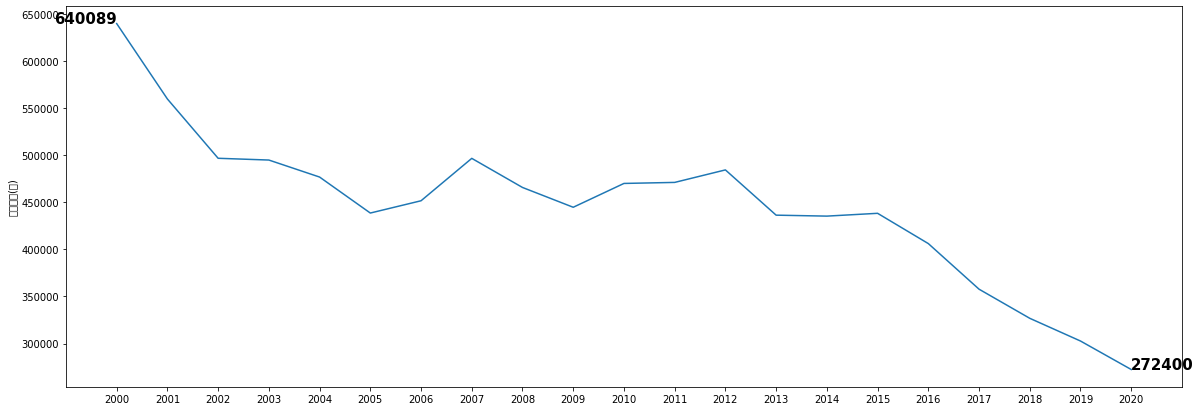

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth.loc['2000':, '출생아수(명)'])
g.text(birth.index[-21], birth.iloc[-21,0], int(birth.iloc[-21,0]), fontsize = 15, weight = 'bold', ha = 'right' )
g.text(birth.index[-1], birth.iloc[-1,0], int(birth.iloc[-1,0]), fontsize = 15, weight = 'bold', ma = 'right' )
plt.show()

합계출산율 (2000년 이후)

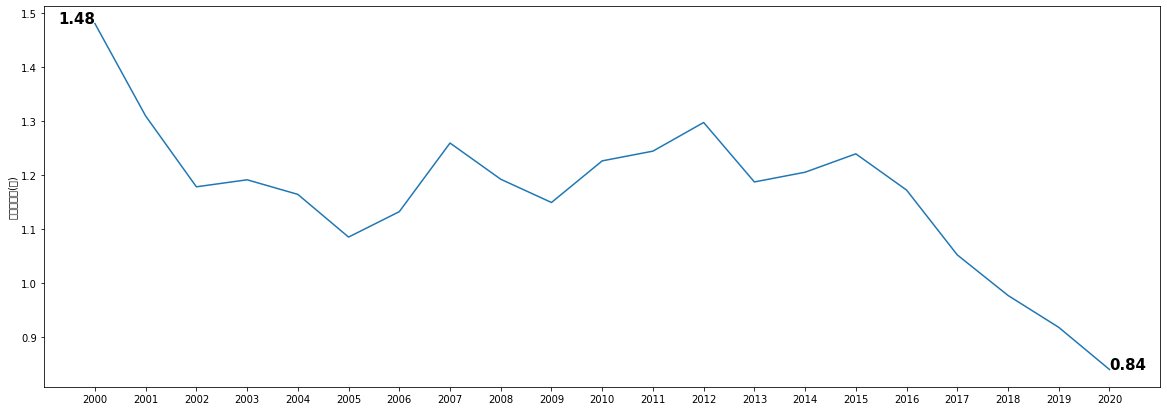

In [ ]:
fig = plt.figure(figsize = (20, 7))
g=sns.lineplot(data = birth.loc['2000':, '합계출산율(명)'])
g.text(birth.index[-21], birth.iloc[-21,4], birth.iloc[-21,4], fontsize = 15, weight = 'bold', ha = 'right' )
g.text(birth.index[-1], birth.iloc[-1,4], birth.iloc[-1,4], fontsize = 15, weight = 'bold', ma = 'right' )
plt.show()

# 2) 시도별 출산율
합계출산율:

- 단위: 가임여성 1명당 명

모의 연령별출산율:

- 단위: 해당연령 여자인구 1천명당 명

- 구간: 15-19세/20-24세/25-29세/30-34세/35-39세/40-44세/45-49세


출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 -시도/합계출산율, 모의 연령별 출산율 (1993~2019)

In [ ]:
sido_birth = pd.read_csv(path+'출산율/'+'시도_합계출산율_모의_연령별_출산율.csv',  encoding = 'cp949',index_col =[0,1],header =[0])
sido_birth.index.names = ['','']
sido_birth=sido_birth.drop(['단위','Unnamed: 30'],axis=1)

sido_birth = sido_birth.T
sido_birth = sido_birth.rename(index=lambda x:x[0:4])
sido_birth = sido_birth.stack()
sido_birth = sido_birth.astype('float64')

sido_birth = sido_birth[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
                         '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

#sido_birth.index[0]['20-24세']
#print(sido_birth.index[0][1])


#sido_birth = sido_birth.astype('float64')
#sido_birth.index[1][0]

#sido_birth.index.names = ['','']
#sido_birth.replace('-',np.NaN,inplace = True)

#print(sido_birth.index.names)

#sido_birth = sido_birth.reindex(index=['모의 연령별출산율:15-19세','합계출산율','20-24세','25-29세','30-34세','35-39세','40-44세','45-49세'])

#sido_birth.loc['1993'].reindex(index=['합계출산율','모의 연령별출산율:15-19세','20-24세','25-29세','30-34세','35-39세','40-44세','45-49세'])
#sido_birth.head(10)
#print(sido_birth.index[0])

#print(sido_birth.index[7])
#sido_birth.xs('합계출산율',level=1)
sido_birth.head(10)

전국    서울특별시    부산광역시  ...     경상북도    경상남도  제주특별자치도
                                                  ...                          
1993 20-24세             71.900   54.200   58.600  ...   71.700   86.80   66.000
     25-29세            176.500  168.400  167.300  ...  177.700  193.60  182.400
     30-34세             63.200   70.000   58.200  ...   54.600   58.40   89.000
     35-39세             13.500   14.000   11.900  ...   12.500   12.50   22.200
     40-44세              2.000    1.800    1.700  ...    1.700    2.00    4.700
     45-49세              0.200    0.200    0.100  ...    0.200    0.10    0.300
     모의 연령별출산율:15-19세    4.400    2.700    2.900  ...    4.000    4.10    4.600
     합계출산율               1.654    1.558    1.505  ...    1.613    1.79    1.847
1994 20-24세             65.400   48.300   52.400  ...   66.900   77.90   63.400
     25-29세            177.500  169.000  164.100  ...  177.300  194.90  185.100

[10 rows x 18 columns]

시간이 지남에 따라 연령대 출산율이 어떻게 변화하는지 살펴보자.(전국 출산율)

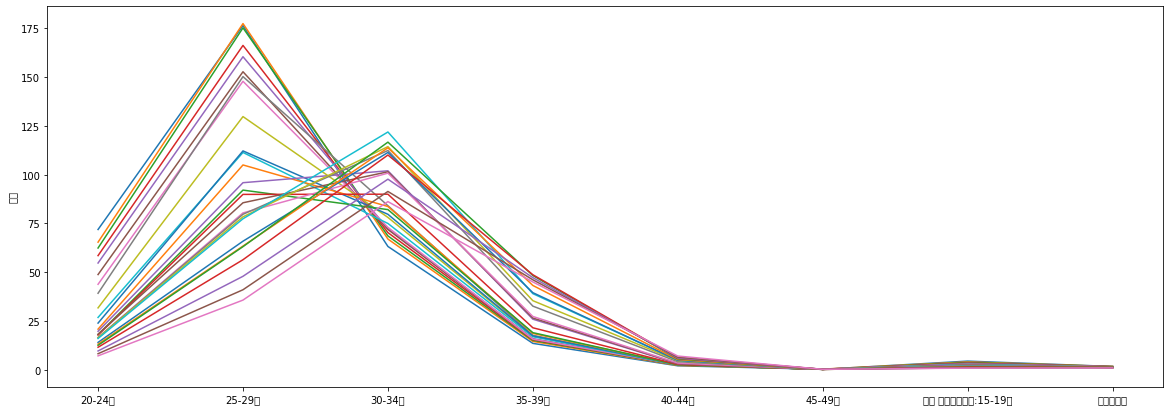

In [ ]:
fig = plt.figure(figsize = (20, 7))
for i in range(1993,2020):
    sns.lineplot(data = sido_birth.loc[str(i)]['전국'])

plt.show()

'25-29세'일 때가 고점인 시기와, '30-34세'일 때가 고짐인 시기로 나누어진 것을 볼 수 있다.

5년 간격으로 살펴보면 2000년대 후반부터 '30-34세'일 때의 출산율이 가장 높아졌다.

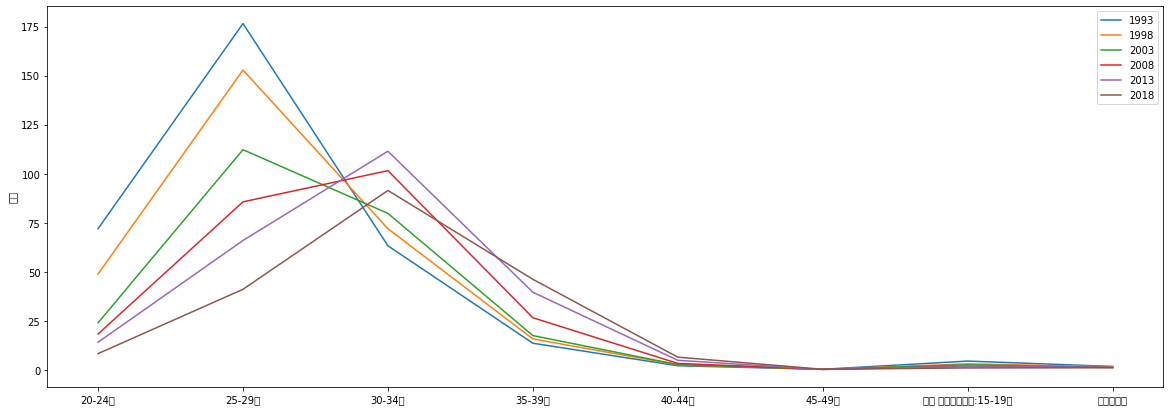

In [ ]:
fig = plt.figure(figsize = (20, 7))
for i in range(1993,2020,5):
    sns.lineplot(data = sido_birth.loc[str(i)]['전국'], label = str(i))
plt.show()

In [ ]:
birth_sum = sido_birth.xs('합계출산율',level = 1,  axis= 0)

연도별 합계출산율을 보았을 때,부산이 최하위를 기록하다 2010년 이후 부터는 서울이 부산을 제치고 최하위 지역이 되었다.

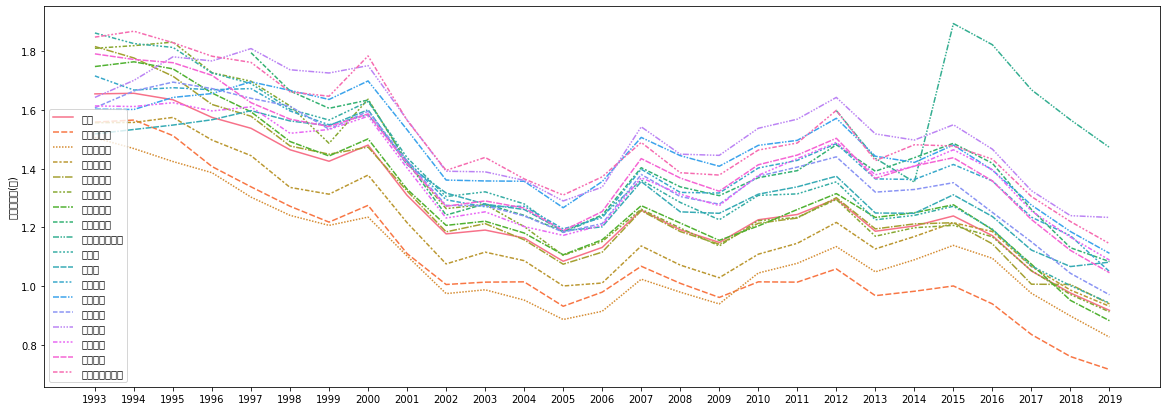

In [ ]:
fig = plt.figure(figsize = (20, 7))
g =sns.lineplot(data = birth_sum)

g.set(ylabel = '합계출산율(명)')
plt.show()

이후 부터는 전국과 부산 데이터만 사용해서 알아보았다.

In [ ]:
#연령대 별 데이터 생성
birth_sum = sido_birth.xs('합계출산율',level = 1,  axis= 0)[['전국','부산광역시']]
birth_20 = sido_birth.xs('20-24세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_25 = sido_birth.xs('25-29세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_30 = sido_birth.xs('30-34세',level = 1,  axis= 0)[['전국','부산광역시']]
birth_35 = sido_birth.xs('35-39세',level = 1,  axis= 0)[['전국','부산광역시']]

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


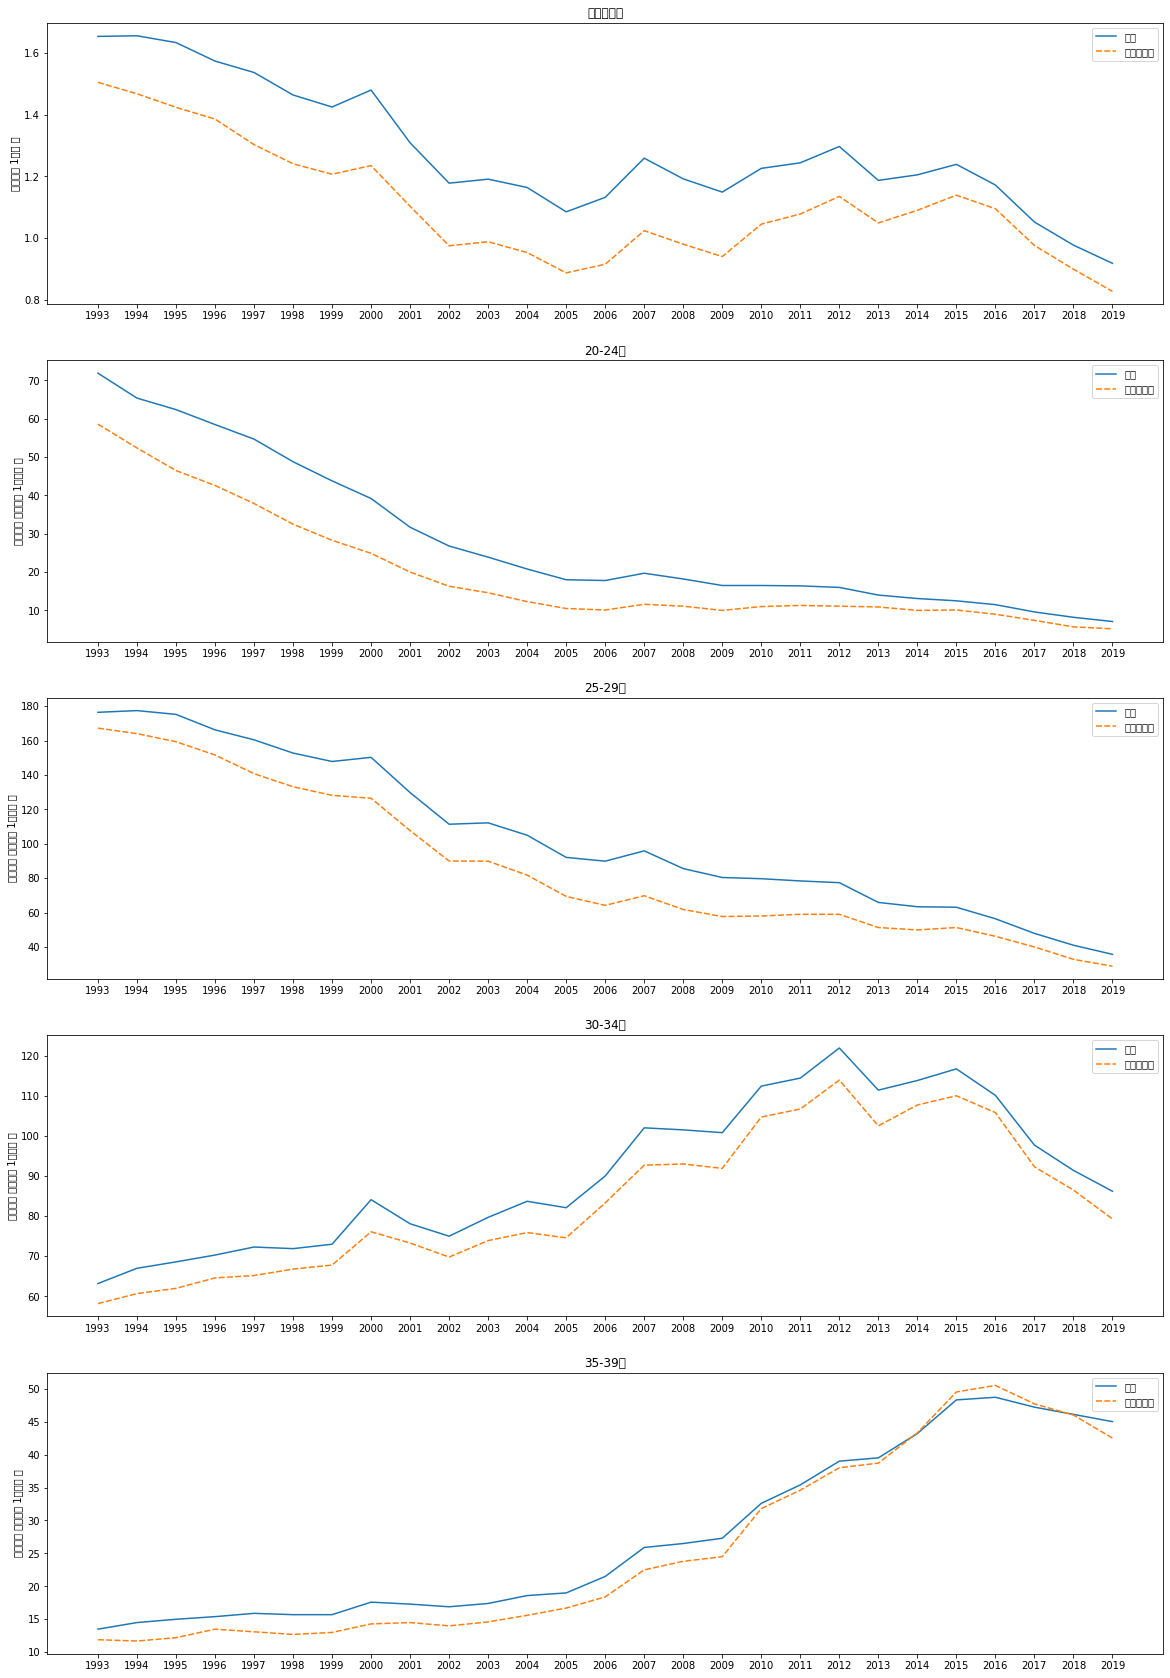

In [ ]:
figure, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(20,30)

sns.lineplot(data = birth_sum, ax = ax1)
sns.lineplot(data = birth_20, ax = ax2)
sns.lineplot(data = birth_25, ax = ax3)
sns.lineplot(data = birth_30, ax = ax4)
sns.lineplot(data = birth_35, ax = ax5)

ax1.set(ylabel = '가임여성 1명당 명',title="합계출산율")
ax2.set(ylabel = '해당연령 여자인구 1천명당 명',title="20-24세")
ax3.set(ylabel = '해당연령 여자인구 1천명당 명', title="25-29세")
ax4.set(ylabel = '해당연령 여자인구 1천명당 명', title="30-34세")
ax5.set(ylabel = '해당연령 여자인구 1천명당 명', title="35-39세")

plt.show()

## 전체적인 출산율 (합계출산율)은 감소하고 있으며,
## 출산연령의 경우 20대의 출산 수는 감소하고 있고, 30대의 출산 수는 증가하고 있다.
출산연령이 높아지고 있다는 것은 다음 데이터를 통해서도 살펴볼 수 있다.


## 평균 출산연령
출처: KOSIS 국가통계포털 - 인구동향조사 - 출생 -시군구/ 모의 평균 출산연령, 모의 연령별(5세간격) 출생 (2000~2019)

In [ ]:
#birth_avg = pd.read_csv(path+'출산율/'+'시군구_모의_평균_출산연령_모의_연령별_5세간격_출생.csv',  encoding = 'cp949',index_col =[0],header =[0],skiprows=[1] )

In [ ]:
birth_avg = pd.read_csv(path+'출산율/'+'시군구_모의_평균_출산연령_모의_연령별_5세간격_출생.csv',  encoding = 'cp949',index_col =[0],header =[0] )
birth_avg = birth_avg.T
birth_avg = birth_avg.drop(['항목','단위','Unnamed: 23'],axis=0)
birth_avg = birth_avg.rename(index=lambda x:x[0:4])
birth_avg = birth_avg.astype('float64')
birth_avg.columns.names =['']

birth_avg = birth_avg.loc[:,~birth_avg.columns.duplicated()]

sido = ['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']

dupl = [False]*birth_avg.columns.size

for i in range(0, birth_avg.columns.size):
  for j in sido:
    if birth_avg.columns[i] == j:
      dupl[i]=True

birth_avg = birth_avg.loc[:,dupl]

birth_avg.tail(3)

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2017,32.60,33.33,32.85,32.64,32.47,32.43,32.39,32.27,32.79,32.71,31.93,31.97,31.80,32.01,31.92,32.10,32.34,32.57
2018,32.80,33.55,33.11,32.83,32.66,32.64,32.52,32.54,32.94,32.95,32.11,32.01,31.95,32.28,32.16,32.29,32.45,32.76
2019,33.01,33.81,33.23,32.94,32.90,32.81,32.79,32.68,33.15,33.14,32.29,32.21,32.19,32.37,32.41,32.47,32.70,32.95


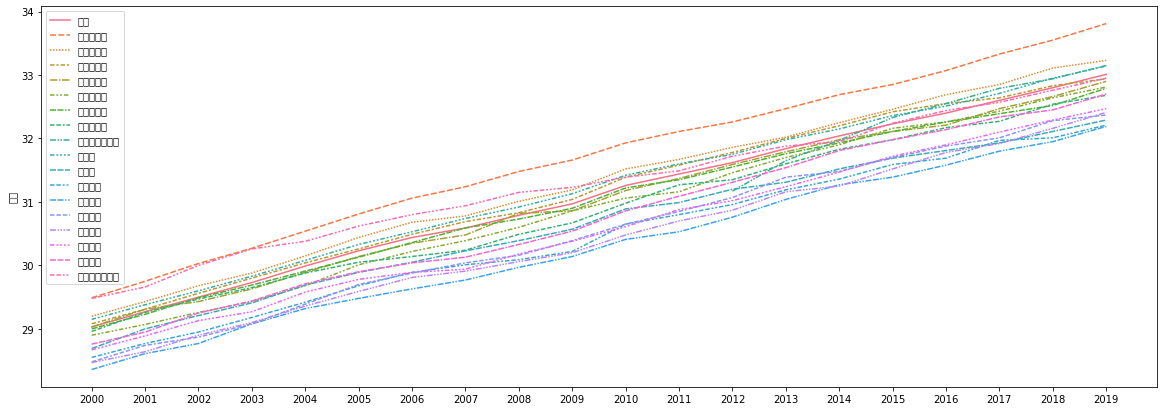

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth_avg)

g.set(ylabel = '연령')
plt.show()

전국, 부산 데이터만 추출

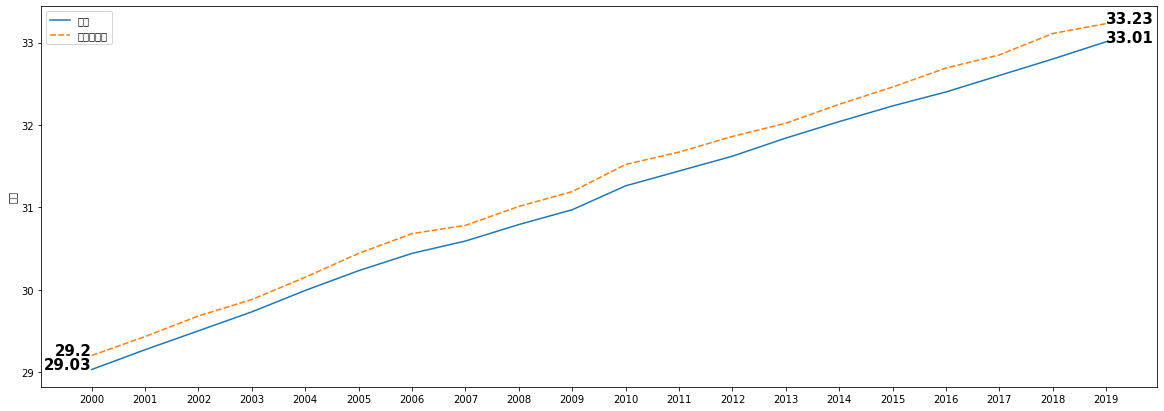

In [ ]:
fig = plt.figure(figsize = (20, 7))
g = sns.lineplot(data = birth_avg[['전국','부산광역시']]) # ['서울']

g.text(birth_avg.index[0], birth_avg.loc['2000','전국'], birth_avg.loc['2000','전국'],fontsize = 15, weight = 'bold', ha = 'right')
#g.text(birth_avg.index[0], birth_avg.loc['2000','서울특별시'], birth_avg.loc['2000','서울특별시'],fontsize = 15, weight = 'bold', ha = 'right') 
g.text(birth_avg.index[0], birth_avg.loc['2000','부산광역시'], birth_avg.loc['2000','부산광역시'],fontsize = 15, weight = 'bold', ha = 'right') 
g.text(birth_avg.index[-1], birth_avg.loc['2019','전국'], birth_avg.loc['2019','전국'],fontsize = 15, weight = 'bold', ma = 'right')
#g.text(birth_avg.index[-1], birth_avg.loc['2019','서울특별시'], birth_avg.loc['2019','서울특별시'],fontsize = 15, weight = 'bold', ma = 'right') 
g.text(birth_avg.index[-1], birth_avg.loc['2019','부산광역시'], birth_avg.loc['2019','부산광역시'],fontsize = 15, weight = 'bold', ma = 'right')

g.set(ylabel = '연령')
plt.show()

전국적으로 산모의 평균출산연령이 증가하고 있으며, 서울은 전국평균보다 더 높다.


## 2. 혼인율

1) 시도별 혼인율

단위: 천명당 혼인건수 (연령별의 경우 해당연령 천명당 건)
출처:

KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 연령별 혼인율, 혼인건수 -시도/일반혼인율 (1990~2020)

KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 연령별 혼인율, 혼인건수 -시도/성/연령별 혼인율 (1990~2020)

In [ ]:
#marriage = pd.read_csv(path+'시도_일반혼인율.csv',  encoding = 'cp949',index_col =[0],header =[0,1] )
#marriage_age = pd.read_csv(path+'시도_성_연령별_혼인율.csv',  encoding = 'cp949',index_col =[0,1],header =[0,1])

In [ ]:
marriage = pd.read_csv(path+'출산율/'+'시도_일반혼인율.csv',  encoding = 'cp949',index_col =[0,1],header =[0] )

marriage = marriage.T
#marriage = marriage.drop(['단위'],axis=0)
marriage = marriage.rename(index=lambda x:x[0:4])
marriage.columns.names= ['','']
marriage.replace('-',np.NaN, inplace = True)


#for i in marriage.columns:

#marriage = marriage.loc[:,~marriage.columns.duplicated()]

#marriage.replace('-',np.NaN, inplace = True)
#marriage = marriage.astype('float64')

#print(marriage.columns[0][1])

#t = marriage[['전국']] #,'서울특별시','부산광역시']].T
#t = marriage.index[[0]]

marriage = marriage.stack()
marriage = marriage[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

marriage.head(4)
#marriage.xs('남편',level=1, axis=0).head(3)
#marriage.xs('남편',level = 1,  axis= 0)[['전국','부산광역시']]

전국 서울특별시 부산광역시 대구광역시 인천광역시  ...  전라북도  전라남도  경상북도  경상남도 제주특별자치도
                                       ...                                
1990 남편  25.2  26.5  23.4  21.8  26.4  ...  22.9  24.9  26.2  26.8    21.4
     아내  24.9  23.7  21.9  20.4  22.5  ...  27.4  30.5  29.4  26.3    22.3
1991 남편  25.8  27.5  23.4    22  27.4  ...  23.5    26  26.9  26.7    23.4
     아내  25.6  24.8  22.5  20.8  23.7  ...  28.1  31.2  30.3  26.2    24.6

[4 rows x 18 columns]

연도별 시도 혼인율

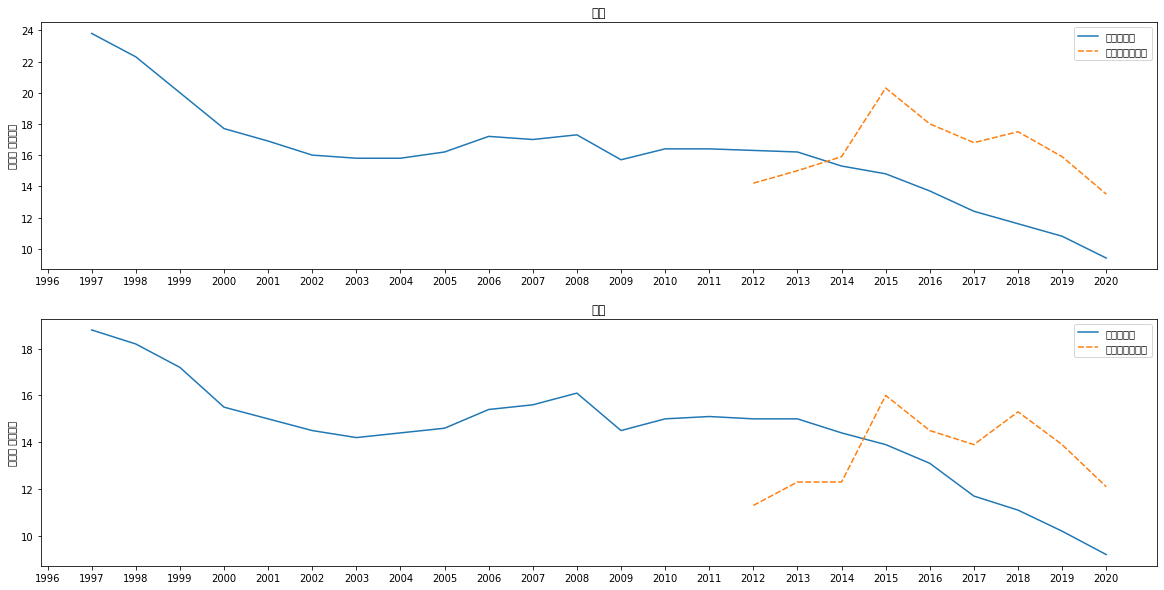

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data = marriage.xs('남편',level = 1,  axis= 0), ax = ax1)
sns.lineplot(data = marriage.xs('아내',level = 1,  axis= 0), ax = ax2)

ax1.set(ylabel = '천명당 혼인건수',title="남편")
ax2.set(ylabel = '천명당 혼인건수',title="아내")

plt.show()

## 전국적으로 혼인율은 낮아지고 있으며, 서울 또한 같은 경향을 보여주고 있다.
다음으론 연령에 따른 혼인률을 살펴보자.

In [ ]:
marriage_age = pd.read_csv(path+'출산율/'+'시도_성_연령별_혼인율.csv',  encoding = 'cp949',index_col =[0,1,2],header =[0])

marriage_age = marriage_age.drop(['단위'],axis=1)

marriage_age = marriage_age.T
#marriage_age.columns.names = ['']
marriage_age = marriage_age.stack(level=2)
#marriage_age = marriage_age(index=lambda x:x[0:4])
marriage_age.replace('-',np.NaN, inplace = True)
marriage_age = marriage_age.astype('float64')
marriage_age = marriage_age[['계','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
                             '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]

marriage_age.head(3)

시도별            계                             ...  제주특별자치도                        
연령별     15 - 19세 20 - 24세 25 - 29세 30 - 34세  ... 60 - 64세 65 - 69세 70 - 74세 75세이상
     항목                                      ...                                 
1990 남편      1.4     26.3    106.1     34.8  ...      1.8      2.1      1.5   1.8
     아내      8.4     92.1     70.9     11.7  ...      0.2      0.4      0.4   0.0
1991 남편      1.4     26.3    109.3     38.3  ...      1.3      3.0      0.9   1.1

[3 rows x 252 columns]

'25-29세', '남편' 데이터로 전체적인 흐름을 살펴보자

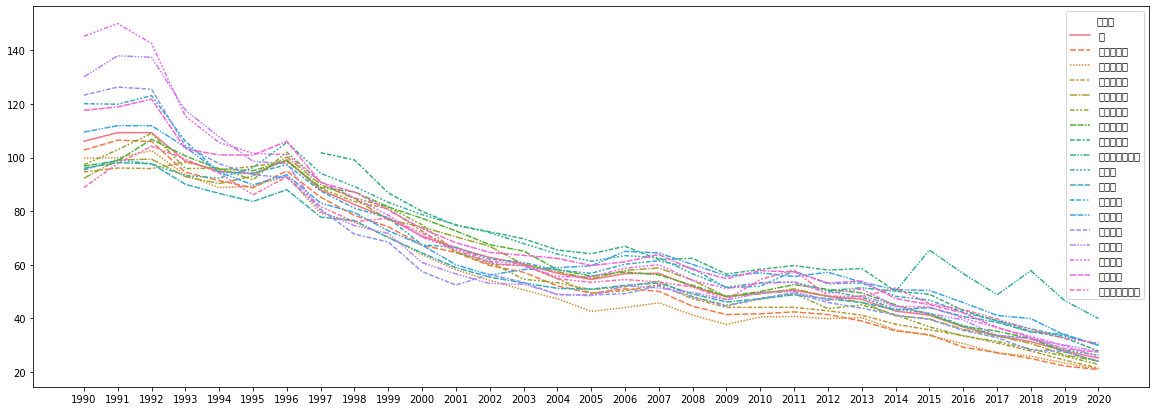

In [ ]:
fig = plt.figure(figsize = (20, 7))
sns.lineplot(data = marriage_age.xs('남편', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1))
plt.show()

In [ ]:
h_20 = marriage_age.xs('남편', level = 1, axis = 0).xs('20 - 24세', level = 1, axis =1)[['계','서울특별시']]
h_25 = marriage_age.xs('남편', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1)[['계','서울특별시']]
h_30 = marriage_age.xs('남편', level = 1, axis = 0).xs('30 - 34세', level = 1, axis =1)[['계','서울특별시']]
h_35 = marriage_age.xs('남편', level = 1, axis = 0).xs('35 - 39세', level = 1, axis =1)[['계','서울특별시']]

w_20 = marriage_age.xs('아내', level = 1, axis = 0).xs('20 - 24세', level = 1, axis =1)[['계','서울특별시']]
w_25 = marriage_age.xs('아내', level = 1, axis = 0).xs('25 - 29세', level = 1, axis =1)[['계','서울특별시']]
w_30 = marriage_age.xs('아내', level = 1, axis = 0).xs('30 - 34세', level = 1, axis =1)[['계','서울특별시']]
w_35 = marriage_age.xs('아내', level = 1, axis = 0).xs('35 - 39세', level = 1, axis =1)[['계','서울특별시']]

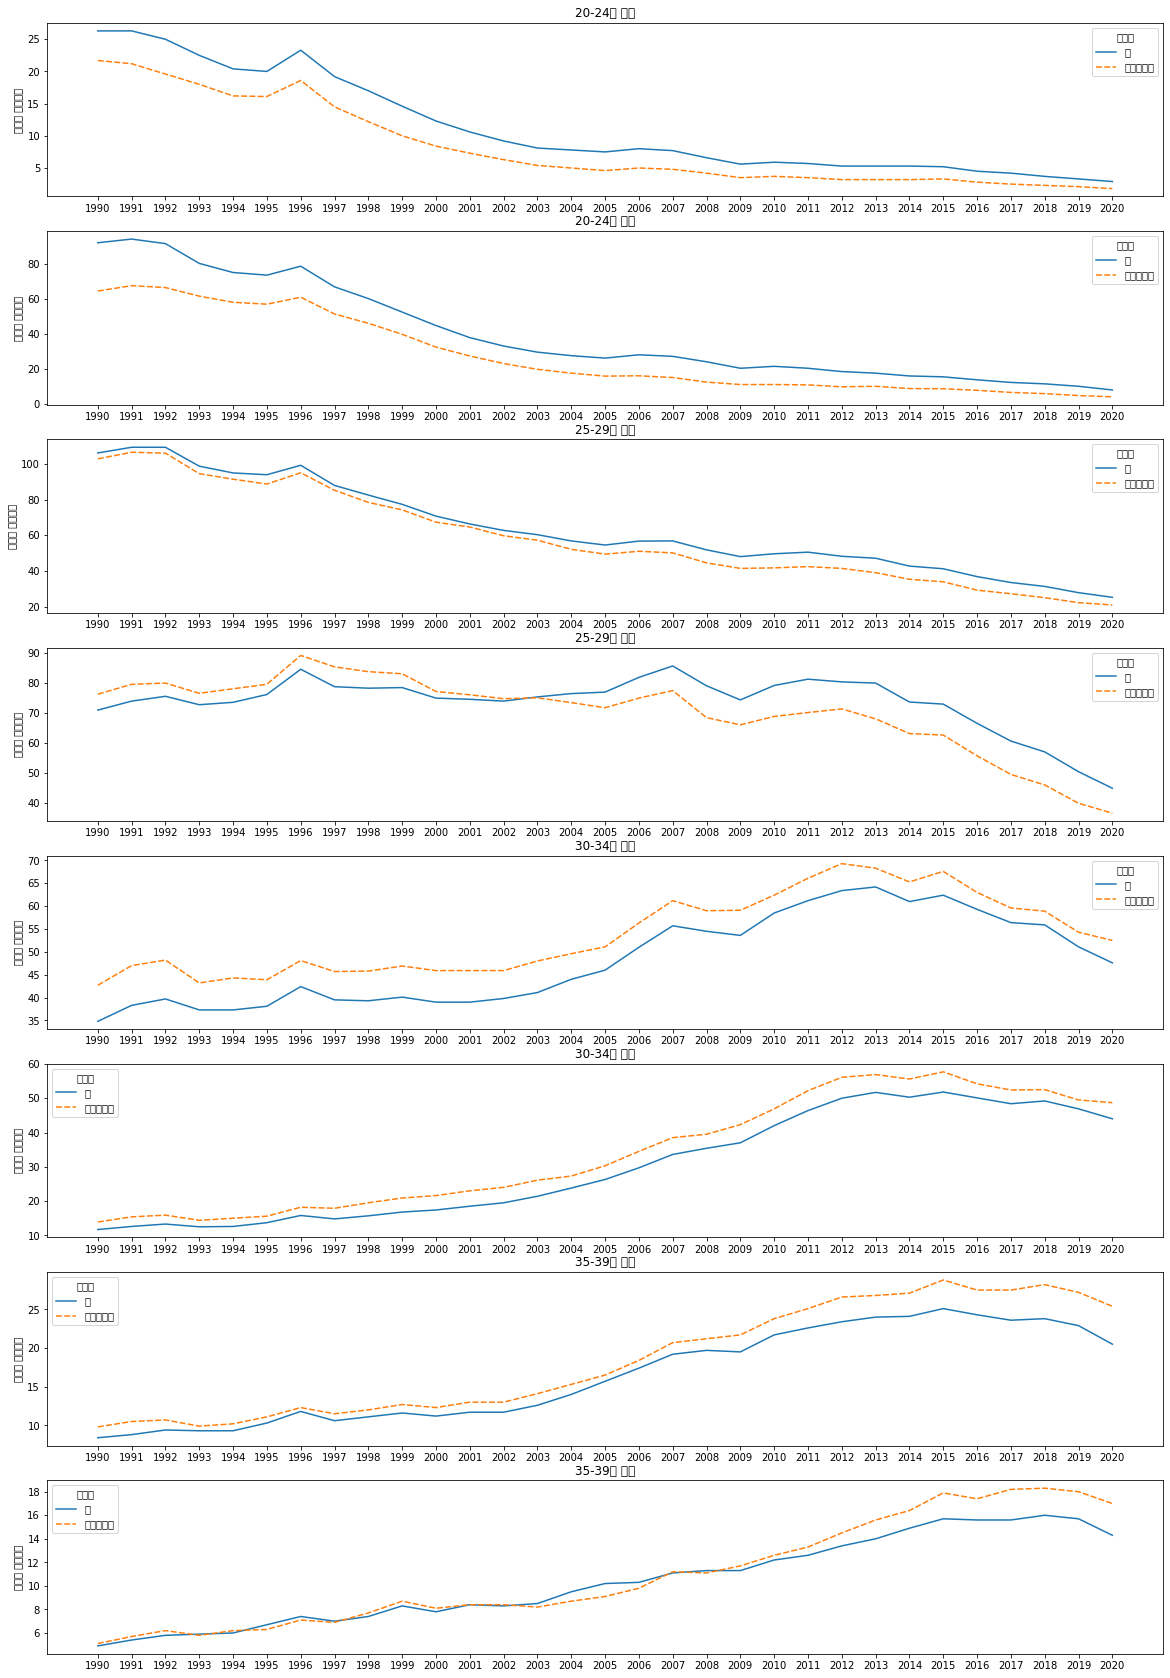

In [ ]:
figure, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)) = plt.subplots(nrows=8, ncols=1)
figure.set_size_inches(20,30)

sns.lineplot(data = h_20, ax = ax1)
sns.lineplot(data = w_20, ax = ax2)

sns.lineplot(data = h_25, ax = ax3)
sns.lineplot(data = w_25, ax = ax4)

sns.lineplot(data = h_30, ax = ax5)
sns.lineplot(data = w_30, ax = ax6)

sns.lineplot(data = h_35, ax = ax7)
sns.lineplot(data = w_35, ax = ax8)


ax1.set(ylabel = '천명당 혼인건수', title="20-24세 남편")
ax2.set(ylabel = '천명당 혼인건수', title="20-24세 아내")
ax3.set(ylabel = '천명당 혼인건수', title="25-29세 남편")
ax4.set(ylabel = '천명당 혼인건수', title="25-29세 아내")
ax5.set(ylabel = '천명당 혼인건수', title="30-34세 남편")
ax6.set(ylabel = '천명당 혼인건수', title="30-34세 아내")
ax7.set(ylabel = '천명당 혼인건수', title="35-39세 남편")
ax8.set(ylabel = '천명당 혼인건수', title="35-39세 아내")

plt.show()

## 혼인시기가 점차 늦어지고 있다.
혼인 연령이 늦어지고 있다는 것은 다음 데이터를 통해서도 살펴볼 수 있다.

# 시도 평균초혼연령
출처: KOSIS 국가통계포털 - 인구동향조사 - 혼인 - 혼인종류(초혼, 재혼)별 혼인건수, 혼인연령 -시도별 평균초혼연령 (1990~2020)

In [ ]:
marriage_avg = pd.read_csv(path+'출산율/'+'시도별_평균초혼연령.csv',  encoding = 'cp949',index_col =[0,1],header =[0])

marriage_avg = marriage_avg.T
marriage_avg = marriage_avg.drop(['단위','Unnamed: 34'],axis=0)
marriage_avg.columns.names= ['',''] 
marriage_avg = marriage_avg.rename(index=lambda x:x[0:4])
marriage_avg.replace('-',np.NaN, inplace = True)

marriage_avg = marriage_avg.stack()
marriage_avg = marriage_avg[['전국','서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시',
        '경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도','국외']]
marriage_avg = marriage_avg.astype('float64')

marriage_avg.head(4)

전국  서울특별시  부산광역시  대구광역시  인천광역시  ...   전라남도   경상북도   경상남도  제주특별자치도     국외
                                            ...                                     
1990 남편  27.79  28.26  27.96  27.66  27.80  ...  27.33  27.32  27.45    27.71  32.41
     아내  24.78  25.54  25.03  24.95  24.95  ...  24.07  24.26  24.27    25.07  27.66
1991 남편  27.91  28.38  28.07  27.78  27.90  ...  27.49  27.40  27.57    27.88  33.42
     아내  24.84  25.58  25.08  25.03  25.03  ...  24.14  24.29  24.37    25.12  27.32

[4 rows x 19 columns]

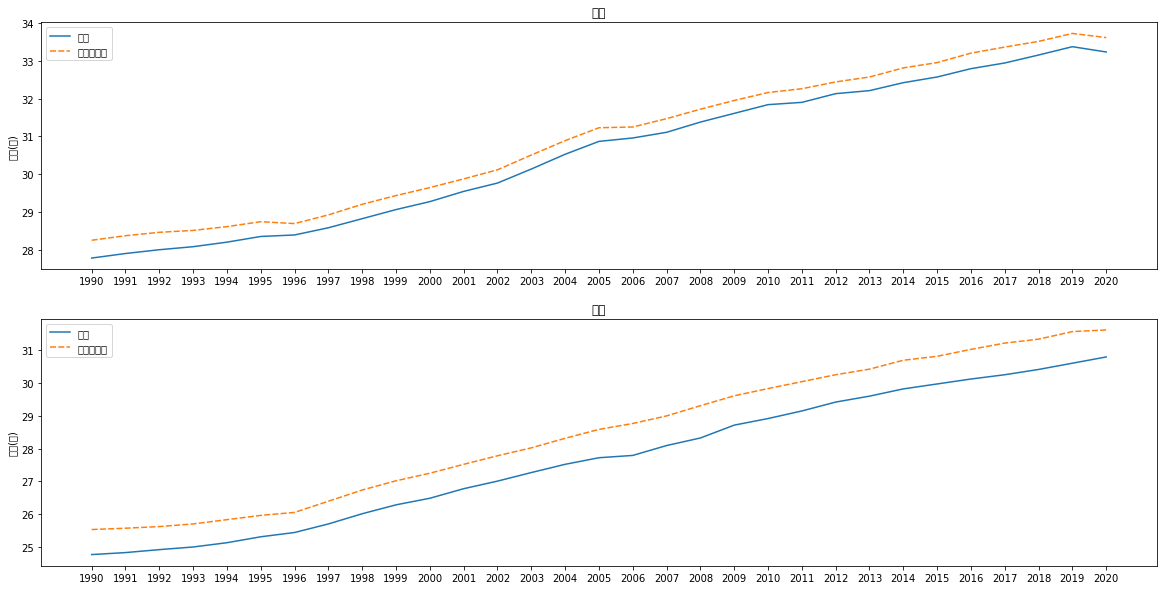

In [ ]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data = marriage_avg.xs('남편', level =1, axis=0)[['전국','서울특별시']], ax = ax1)
sns.lineplot(data = marriage_avg.xs('아내', level =1, axis=0)[['전국','서울특별시']], ax = ax2)

ax1.set(ylabel = '연령(세)',title="남편")
ax2.set(ylabel = '연령(세)',title="아내")

plt.show()

전국적으로 남자와 여자 모두 평균 혼인 연령이 늦어지고 있으며, 서울은 전국평균보다 더 높다.

# **II. 역대 대통령 임기별 부동산 가격 변화**

대통령 정책과 관련한 부동산 가격 변화에 대해 알아보자. 먼저 각 대통령이 실시한 부동산 관련 정책에 대해서 정리를 해보았다,

이번 분석에는 노무현 대통령~문재인 대통령까지의 임기만을 확인해 분석해보았다. 더 이전의 대통령들은 너무 오래되었거나 현재 상황과는 많이 다를거라고 생각하기에 좀 더 정확한 분석결과를 가지기 위해서 노무현 대통령때부터 분석을 해보았다.

먼저 부동산 가격의 변화를 알아보기위해 매매가와 전세가의 변화에 대해서 분석을 해보았다.

#### 이번 분석에는 서울, 경기, 수도권 가격 위주로 분석을 실시하였다.

In [ ]:
geo_data_sigungu = json.load(open(path+'정책/'+'TL_SCCO_SIG.json', encoding='utf-8'))
geo_data_sido = json.load(open(path+'정책/'+'TL_SCCO_CTPRVN.json', encoding='utf-8'))

#geo_data_sigungu = json.load(open('Desktop/부동산/TL_SCCO_SIG.json', encoding='utf-8'))
#geo_data_sido = json.load(open('Desktop/부동산/TL_SCCO_CTPRVN.json', encoding='utf-8'))

In [ ]:
# 제공된 csv 파일 불러오기
c_allow = pd.read_csv(path+'건축허가현황.csv')
total_c = pd.read_csv(path+'국내건설수주액.csv')
first_empty=pd.read_csv(path+'미분양주택현황.csv')
real_apt_cont = pd.read_csv(path+'아파트 실거래가격지수.csv')
cate_month_total = pd.read_csv(path+'유형별_주택월세통합가격지수.csv')
c_real_allow = pd.read_csv(path+'주택건설인허가실적.csv')
house_sell_level = pd.read_csv(path+'주택매매가격지수(KB).csv')
house_borrow_level = pd.read_csv(path+'주택전세가격지수(KB).csv')
region_value = pd.read_csv(path+'지역별_지가변동률.csv')

df_list=[c_allow, total_c, first_empty, real_apt_cont, cate_month_total, c_real_allow, house_sell_level, house_borrow_level, region_value]

In [ ]:
# 인덱스 부분 날짜로 수정
def date(df):
    df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'], format='%Y-%m-%d')
    df.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
    df.set_index('날짜', inplace=True)
    return df

for i in df_list:
    date(i)

In [ ]:
# 각 csv 파일의 열목록 확인
df_list_name = ["c_allow", "total_c", "first_empty", "real_apt_cont", "cate_month_total", "c_real_allow", "house_sell_level", "house_borrow_level", "region_value"]

"""
for i in range(len(df_list)):
    print("="*50, df_list_name[i],"="*50)
    print(df_list[i].columns)
    print()
"""

'\nfor i in range(len(df_list)):\n    print("="*50, df_list_name[i],"="*50)\n    print(df_list[i].columns)\n    print()\n'